# SNLP 2021 Final Project

Name 1: Anushka Kothari <br/>
Student id 1: 7015914 <br/>
Email 1: anko00006@stud.uni-saarland.de <br/>


Name 2: Akhil Juneja <br/>
Student id 2: 7015523 <br/>
Email 2: akju00001@stud.uni-saarland.de <br/> 

## **1 Data Preparation (pre-processing and data splitting)**

In [85]:
import os
from pathlib import Path

from importlib import reload
import Pre
Pre = reload(Pre)

### Preprocessing and splitting english text ###

english_text = Path("/home/snlp-project-21/Desktop/SNLP-Project/data/alice_in_wonderland.txt").open('r').read()
preprocess_english_text = Pre.preprocess(english_text)

eng_len = len(preprocess_english_text)
eng_train = preprocess_english_text[:int(0.8 * eng_len)]
eng_test =  preprocess_english_text[int(0.8 * eng_len):]

file = open("eng_train.txt", "w")
file.write(eng_train)
file.close()

file = open("eng_test.txt", "w")
file.write(eng_test)
file.close()

### Preprocessing and splitting bengali text ###

bengali_text = Path("/home/snlp-project-21/Desktop/SNLP-Project/data/bengali_corpus.txt").open('r').read()
preprocess_bengali_text = Pre.preprocess_ben(bengali_text)

ben_len = len(preprocess_bengali_text)
ben_train = preprocess_bengali_text[:int(0.8 * ben_len)]
ben_test =  preprocess_bengali_text[int(0.8 * ben_len):]

file = open("ben_train.txt", "w")
file.write(ben_train)
file.close()

file = open("ben_test.txt", "w")
file.write(ben_test)
file.close()

## **2. Subword Segmentation**

## en_s1

### Training data for character size vocabolary

In [87]:
!spm_train \
  --input=eng_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix \
  --vocab_size=31 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix
  model_type: BPE
  vocab_size: 31
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  a

In [88]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix.model \
  --output_format=piece \
  < eng_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_segmented.txt

In [89]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_original.txt

### Validation data for character size vocabolary

In [90]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix.model \
  --output_format=piece \
  < eng_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt

In [91]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_original.txt

## en_s2

### Training data for lower vocabolary size

In [134]:
!spm_train \
  --input=eng_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix \
  --vocab_size=150 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix
  model_type: BPE
  vocab_size: 150
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  

In [135]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix.model \
  --output_format=piece \
  < eng_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_segmented.txt

In [136]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_original.txt

### Validation data for lower vocabolary size

In [137]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix.model \
  --output_format=piece \
  < eng_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt

In [138]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_original.txt

## en_s3

### Training data for higher vocabolary size

In [228]:
!spm_train \
  --input=eng_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix \
  --vocab_size=2000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
 

bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1240 all=4804 active=1078 piece=▁cor
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1260 all=4815 active=1089 piece=ouble
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1280 all=4816 active=1090 piece=▁roof
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1300 all=4815 active=1089 piece=▁tremb
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=5 min_freq=2
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1320 all=4806 active=989 piece=▁pardon
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5 size=1340 all=4796 active=979 piece=▁somebody
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=4 size=1360 all=4818 active=1001 piece=su
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=4 size=1380 all=4859 active=1042 piece=uck
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=4 size=1400 all=4888 active=1071 piece=ness
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=4 min_freq=2

In [229]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix.model \
  --output_format=piece \
  < eng_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_segmented.txt

In [230]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_original.txt

### Validation data for higher vocabolary size

In [231]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix.model \
  --output_format=piece \
  < eng_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt

In [232]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_original.txt

## bn_s1

### Training data for character size vocabolary

In [176]:
!spm_train \
  --input=ben_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix \
  --vocab_size=51 \
  --character_coverage=0.995 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ben_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix
  model_type: BPE
  vocab_size: 51
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc

In [177]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix.model \
  --output_format=piece \
  < ben_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_segmented.txt

In [178]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_original.txt

### Validation data for character size vocabolary

In [179]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix.model \
  --output_format=piece \
  < ben_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt

In [180]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_original.txt

## bn_s2

### Training data for lower vocabolary size

In [198]:
!spm_train \
  --input=ben_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix \
  --vocab_size=200 \
  --character_coverage=0.995 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ben_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix
  model_type: BPE
  vocab_size: 200
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfk

In [199]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix.model \
  --output_format=piece \
  < ben_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_segmented.txt

In [200]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_original.txt

### Validation data for lower vocabolary size

In [201]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix.model \
  --output_format=piece \
  < ben_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt

In [202]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_original.txt

## bn_s3

### Training data for higher vocabolary size

In [242]:
!spm_train \
  --input=ben_train.txt \
  --model_prefix=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix \
  --vocab_size=2000 \
  --character_coverage=0.995 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ben_train.txt
  input_format: 
  model_prefix: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nf

bpe_model_trainer.cc(258) LOG(INFO) Added: freq=13 size=1180 all=16175 active=1233 piece=▁বনইছ
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=12 size=1200 all=16290 active=1348 piece=ময়
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=12 min_freq=6
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=12 size=1220 all=16372 active=1067 piece=▁থকই
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=12 size=1240 all=16399 active=1094 piece=▁ফরয়
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=11 size=1260 all=16486 active=1181 piece=ষটর
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=11 size=1280 all=16580 active=1275 piece=▁খলয
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=11 size=1300 all=16595 active=1290 piece=▁সবম
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=11 min_freq=5
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=11 size=1320 all=16616 active=1022 piece=▁সহবর
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=10 size=1340 all=16628 active=1

In [243]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix.model \
  --output_format=piece \
  < ben_train.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_segmented.txt

In [244]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_original.txt

### Validation data for higher vocabolary size

In [245]:
!spm_encode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix.model \
  --output_format=piece \
  < ben_test.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt

In [246]:
!spm_decode \
  --model=/home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_model_prefix.model \
  --input_format=piece \
  < /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt \
  > /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_original.txt

### **Observation for segmented files**

We analyzed the segmented files for all 6 models and observed that **en_s1_train_segmented.txt** file has subword encoding at character level, where each word is splitted into sub words consisting of just single character. Number of characters in the subword increases as we move from **en_s2_train_segmented.txt** to **en_s3_train_segmented.txt**. This happens because vocabolary size is increaing and model is able to identify more subwords with higher vocabolary. There is also the case with segmented files for bengali corpus. 

## 3. LM Training

In [115]:
!rm -rf models/rnnlm/* \
 && mkdir -p models/rnnlm

## en_s1

In [92]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s1_model_rnnlm*
!/home/snlp-project-21/rnnlm/rnnlm \
   -train /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_segmented.txt \
   -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt \
   -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s1_model_rnnlm \
   -hidden 80 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 10

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt
class size: 10
Hidden layer size: 80
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s1_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_train_segmented.txt
Vocab size: 29
Words in train file: 110167
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 2.9263    Words/sec: 81749.2   VALID entropy: 2.7729
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.5067    Words/sec: 84602.3   VALID entropy: 2.6613
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.3797    Words/sec: 83915.3   VALID entropy: 2.5837
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.3007    Words/sec: 82849.5   VALID entropy: 2.5421
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.2484    Words/sec: 82315.3   VALID entropy: 2.5153
Iter:   5	Alpha: 0.100000

### Perplexity for en_s1 

In [93]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s1_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s1/en_s1_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s1_model_rnnlm

test log probability: -18233.048936

PPL net: 4.579407


## en_s2

In [194]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s2_model_rnnlm* 
!/home/snlp-project-21/rnnlm/rnnlm \
   -train /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_segmented.txt \
   -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt \
   -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s2_model_rnnlm \
   -hidden 100 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 20

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt
class size: 20
Hidden layer size: 100
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s2_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_train_segmented.txt
Vocab size: 148
Words in train file: 53916
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 6.0703    Words/sec: 30170.0   VALID entropy: 5.5211
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 5.0723    Words/sec: 31412.8   VALID entropy: 5.1300
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 4.7528    Words/sec: 27373.1   VALID entropy: 4.9765
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 4.5642    Words/sec: 25461.2   VALID entropy: 4.8881
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 4.4234    Words/sec: 31812.3   VALID entropy: 4.8311
Iter:   5	Alpha: 0.10000

### Perplexity for en_s2

In [195]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s2_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s2/en_s2_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s2_model_rnnlm

test log probability: -18350.949110

PPL net: 22.130085


## en_s3

In [233]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s3_model_rnnlm*
!/home/snlp-project-21/rnnlm/rnnlm \
   -train /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_segmented.txt \
   -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt \
   -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s3_model_rnnlm \
   -hidden 120 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 50

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt
class size: 50
Hidden layer size: 120
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s3_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_train_segmented.txt
Vocab size: 1763
Words in train file: 26859
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.4110    Words/sec: 16298.7   VALID entropy: 8.6434
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 8.0868    Words/sec: 18007.3   VALID entropy: 8.3775
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.8193    Words/sec: 18148.2   VALID entropy: 8.2342
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.6081    Words/sec: 18126.2   VALID entropy: 8.1337
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.4308    Words/sec: 18054.4   VALID entropy: 8.0557
Iter:   5	Alpha: 0.1000

### Perplexity for en_s3

In [234]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s3_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/en_s3/en_s3_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/en_s3_model_rnnlm

test log probability: -16971.650801

PPL net: 203.883621


## bn_s1

In [254]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s1_model_rnnlm*
!/home/snlp-project-21/rnnlm/rnnlm \
 -train /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_segmented.txt \
 -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt \
 -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s1_model_rnnlm \
   -hidden 100 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 15

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt
class size: 15
Hidden layer size: 100
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s1_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_train_segmented.txt
Vocab size: 331
Words in train file: 831715
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.3211    Words/sec: 49687.5   VALID entropy: 3.2829
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 3.1527    Words/sec: 48713.9   VALID entropy: 3.2144
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 3.1028    Words/sec: 49419.3   VALID entropy: 3.1872
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 3.0755    Words/sec: 49419.6   VALID entropy: 3.1724
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 3.0586    Words/sec: 49816.9   VALID entropy: 3.1617
Iter:   5	Alpha: 0.1000

### Perplexity for bn_s1

In [255]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s1_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s1/bn_s1_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s1_model_rnnlm

test log probability: -191342.088877

PPL net: 8.306007


## bn_s2

In [251]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s2_model_rnnlm*
!/home/snlp-project-21/rnnlm/rnnlm \
   -train /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_segmented.txt \
   -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt \
   -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s2_model_rnnlm \
   -hidden 110 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 25

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt
class size: 25
Hidden layer size: 110
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s2_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_train_segmented.txt
Vocab size: 480
Words in train file: 449873
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 6.1315    Words/sec: 38158.7   VALID entropy: 5.9900
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 5.8017    Words/sec: 37568.4   VALID entropy: 5.8788
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 5.7040    Words/sec: 37396.8   VALID entropy: 5.8239
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.6405    Words/sec: 37622.6   VALID entropy: 5.7848
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.5956    Words/sec: 38133.6   VALID entropy: 5.7540
Iter:   5	Alpha: 0.1000

### Perplexity for bn_s2

In [253]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s2_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s2/bn_s2_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s2_model_rnnlm

test log probability: -190791.512201

PPL net: 48.305256


## bn_s3

In [256]:
!rm -rf /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s3_model_rnnlm*
!/home/snlp-project-21/rnnlm/rnnlm \
 -train /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_segmented.txt \
 -valid /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt \
 -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s3_model_rnnlm \
   -hidden 120 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 40

debug mode: 2
train file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_segmented.txt
valid file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt
class size: 40
Hidden layer size: 120
BPTT: 3
Rand seed: 1
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s3_model_rnnlm
Starting training using file /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_train_segmented.txt
Vocab size: 2277
Words in train file: 281556
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 9.4940    Words/sec: 24568.0   VALID entropy: 9.3488
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 9.1211    Words/sec: 25114.5   VALID entropy: 9.1046
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 8.9046    Words/sec: 23951.6   VALID entropy: 8.9780
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 8.7638    Words/sec: 25188.5   VALID entropy: 8.8937
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 8.6513    Words/sec: 25596.2   VALID entropy: 8.8317
Iter:   5	Alpha: 0.100

### Perplexity for bn_s3

In [257]:
#Perplexity
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s3_model_rnnlm -test /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt

test file: /home/snlp-project-21/Desktop/SNLP-Project/spm/bn_s3/bn_s3_test_segmented.txt
rnnlm file: /home/snlp-project-21/Desktop/SNLP-Project/models/rnnlm/bn_s3_model_rnnlm

test log probability: -184783.441710

PPL net: 393.401241


## **4 Text Generation**

## en_s1

In [227]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s1.sh

Generating data for en s1...


## en_s2

In [258]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s2.sh

Generating data for en s2...


## en_s3

In [259]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s3.sh

Generating data for en s3...


## bn_s1

In [261]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s1.sh

Generating data for bn s1...


## bn_s2

In [262]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s2.sh

Generating data for bn s2...


## bn_s3

In [263]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s3.sh

Generating data for bn s3...


### Decoding generated files for all models

In [267]:
%%bash
/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/decode_data.sh

Decoding data for all models..


### **Inspection of "100.txt" file**

When we inspected "100.txt" file for all models, we observed that there no proper words in the file generated by lower vocabolary model but as we go higher in vocabolary size, we can see the presence of more rich, proper and refined words in the file. This is because higher vocabolary model is able to identify more proper and correct words. We can easliy see that quality of text generation is improving. This scenario is same for both english and bengali.

### "100.txt" - en_s1

and annts osess tonh you didy a long prinand i whod porply with her ask that pacright you showed tu

### "100.txt" - en_s2

howing oner to the pig or quite poot toan fatch so that the dime silere said and ive pution and the clacts again teak
ining brole the bations would not happen apeend poor alice alice inston
hadden she said the cat

### "100.txt" - en_s3

but thinking usual sounded off with which dinah i couldnt am after i has hairmentin dpto sle

it very time in a voice of c direction

are you know theyre till a thing she do the rabbitor still you know of

ver does said the right thing

go round what to speak and drew a little

well as there was as she you dont
beheaded and with his eyes half to school

so read youll itll and went onranv

### "100.txt" - bn_s1

আম ও ওয়ন বচর পল ফস দকদখরম দখত পরছ অসধরণ হক ওদর আগ আগরগ চন মসব ওন জন তর বযবসথ করছ ক মন কর
কর ববর হ

### "100.txt" - bn_s2

কজনর পর হয়ছ এই শরমজ লগ করনখনকর বচচ গরযকট আর তকএকট কথ মন নই আর নইআমর ত আমদর নরর সময়য করত হব আমর তদর বনচ জবন ন আপনক পর বরবলদশর ভডও আছ সব সময ক ভডও বন ডবতর ভডও খরপ লকট দওয় হকন সট পল জত মর খল হক বলছ যর সহ

### "100.txt" - bn_s3


ত চইএই ময় ওক ফস দওয় হকমগর ছদ মহলল ছল ফর জনক বচরর তলন করটই শয়তন রতন হয তহল বঝত পর আললহ মনন ছলক সবভবক দশর ডস কতন করছন এট বঝতম মন হয যবখনকরবসক জমহড় করবন আর কন ওয়জও আমর সথ বজ সধরণ মনষ বলদশর ডস হট বযলই কর পপন ভই আমর করন আর ধরত মনষ নই একজন মথ সনদর ভষ বলবনমশফকরনর হজর দশর মজ করত সই অনযয় লভ কনত জতপট কর হচছ সমজক পরম ন তম থকব আজ

## **5 OOV comparison**

In [344]:
import re
import os
from pathlib import Path

from importlib import reload
import CalcOOV
CalcOOV = reload(CalcOOV)

eng_train = Path("/home/snlp-project-21/Desktop/SNLP-Project/eng_train.txt").open('r').read()
eng_train = re.sub('\s+', " ", eng_train) # Removing white spaces
eng_train_tokens = eng_train.split(" ")

eng_test = Path("/home/snlp-project-21/Desktop/SNLP-Project/eng_test.txt").open('r').read()
eng_test = re.sub('\s+', " ", eng_test) # Removing white spaces
eng_test_tokens = eng_test.split(" ")

oov_rate = CalcOOV.calc_oov_rate(eng_train_tokens, eng_test_tokens)
print("OOV rate for original english text is", oov_rate)


ben_train = Path("/home/snlp-project-21/Desktop/SNLP-Project/ben_train.txt").open('r').read()
ben_train = re.sub('\s+', " ", ben_train) # Removing white spaces
ben_train_tokens = ben_train.split(" ")

ben_test = Path("/home/snlp-project-21/Desktop/SNLP-Project/ben_test.txt").open('r').read()
ben_test = re.sub('\s+', " ", ben_test) # Removing white spaces
ben_test_tokens = ben_test.split(" ")

oov_rate = CalcOOV.calc_oov_rate(ben_train_tokens, ben_test_tokens)
print("OOV rate for original bengali text is", oov_rate)

OOV rate for original english text is 0.09036723706979427
OOV rate for original bengali text is 0.103604932444392


### oov rates for en_s1

In [308]:
en_s1_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s1/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    en_s1_oov_rates[file] = k

en_s1_oov_rates = dict(sorted(en_s1_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in en_s1_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 1000_decoded.txt is 0.08998269563545472
OOV rate for file 10000_decoded.txt is 0.08556046914054989
OOV rate for file 100000_decoded.txt is 0.08267640838300327
OOV rate for file 1000000_decoded.txt is 0.07710055758507979
OOV rate for file 10000000_decoded.txt is 0.06633339742357239


### plotting graph of oov rates for en_s1

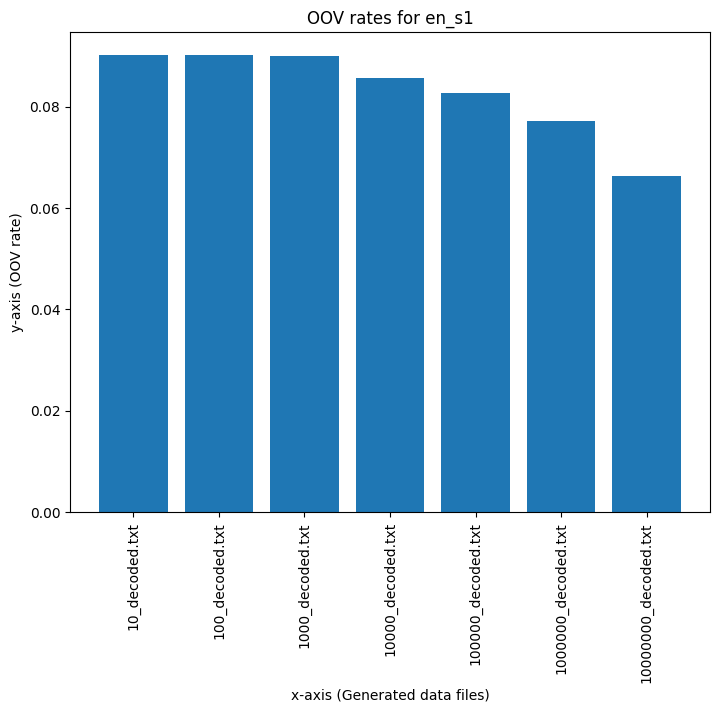

In [309]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in en_s1_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for en_s1")
plt.xticks(rotation=90)
plt.show()

### oov rates for en_s2

In [310]:
en_s2_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s2/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    en_s2_oov_rates[file] = k

en_s2_oov_rates = dict(sorted(en_s2_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in en_s2_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 1000_decoded.txt is 0.0901749663526245
OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 10000_decoded.txt is 0.08921361276677563
OOV rate for file 100000_decoded.txt is 0.07960007690828687
OOV rate for file 1000000_decoded.txt is 0.06902518746394924
OOV rate for file 10000000_decoded.txt is 0.059219380888290714


### plotting graph of oov rates for en_s2

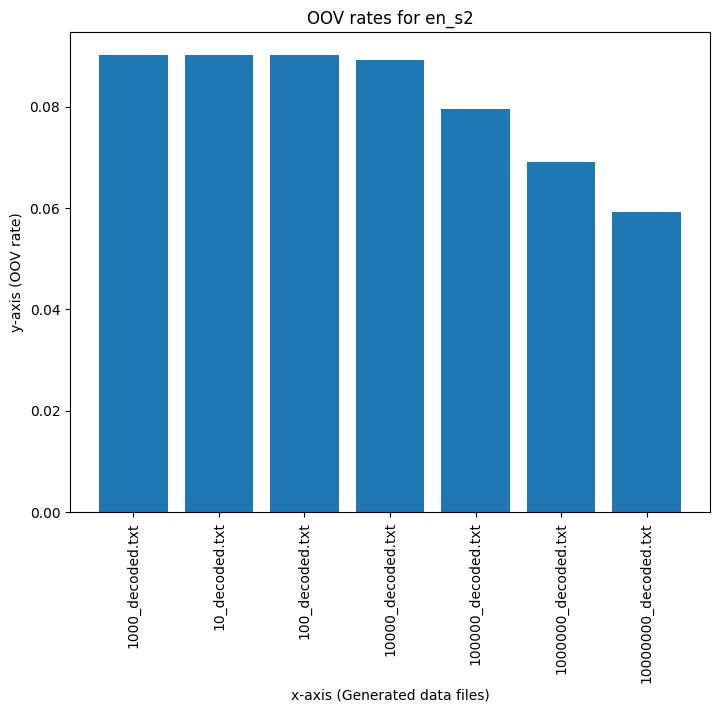

In [312]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in en_s2_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for en_s2")
plt.xticks(rotation=90)
plt.show()

### oov rates for en_s3

In [311]:
en_s3_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/en_s3/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    en_s3_oov_rates[file] = k

en_s3_oov_rates = dict(sorted(en_s1_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in en_s3_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 1000_decoded.txt is 0.08998269563545472
OOV rate for file 10000_decoded.txt is 0.08556046914054989
OOV rate for file 100000_decoded.txt is 0.08267640838300327
OOV rate for file 1000000_decoded.txt is 0.07710055758507979
OOV rate for file 10000000_decoded.txt is 0.06633339742357239


### plotting graph of oov rates for en_s3

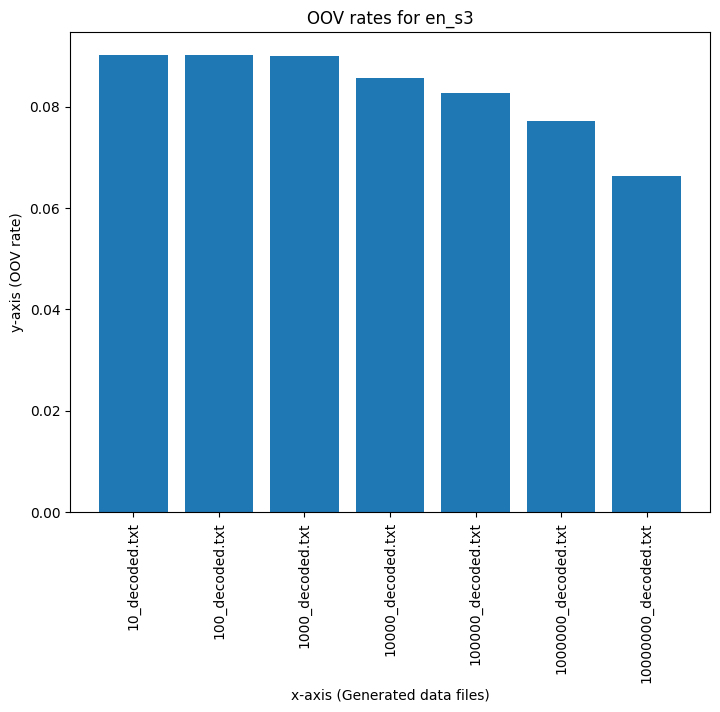

In [313]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in en_s3_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for en_s3")
plt.xticks(rotation=90)
plt.show()

### oov rates for bn_s1

In [323]:
bn_s1_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s1/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    bn_s1_oov_rates[file] = k

bn_s1_oov_rates = dict(sorted(bn_s1_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in bn_s1_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 1000_decoded.txt is 0.0901749663526245
OOV rate for file 10000_decoded.txt is 0.0901749663526245
OOV rate for file 100000_decoded.txt is 0.0901749663526245
OOV rate for file 1000000_decoded.txt is 0.0901749663526245
OOV rate for file 10000000_decoded.txt is 0.08998269563545472


### plotting graph of oov rates for bn_s1

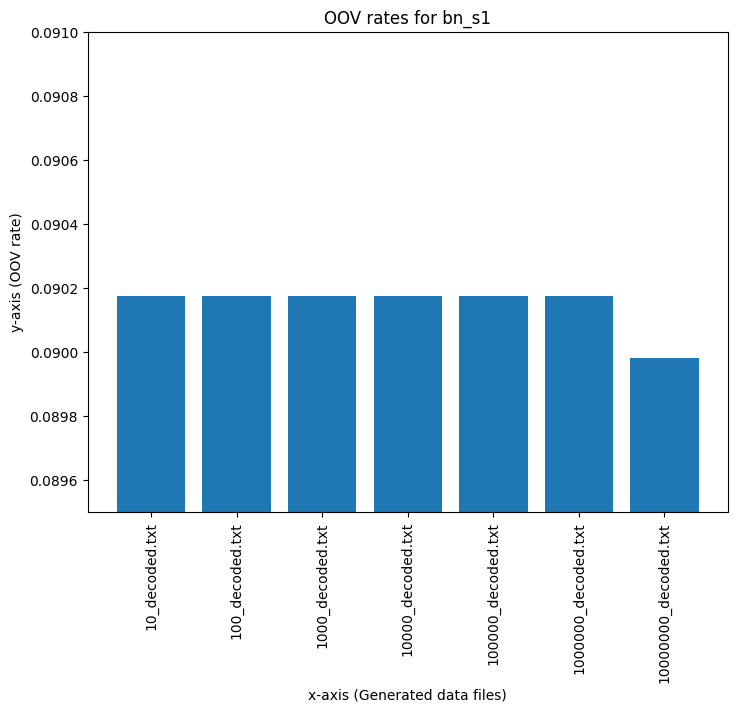

In [335]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in bn_s1_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.ylim(0.0895, 0.0910)
plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for bn_s1")
plt.xticks(rotation=90)
plt.show()

### oov rates for bn_s2

In [336]:
bn_s2_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s2/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    bn_s2_oov_rates[file] = k

bn_s2_oov_rates = dict(sorted(bn_s2_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in bn_s2_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 1000_decoded.txt is 0.0901749663526245
OOV rate for file 10000_decoded.txt is 0.0901749663526245
OOV rate for file 100000_decoded.txt is 0.0901749663526245
OOV rate for file 1000000_decoded.txt is 0.08979042491828494
OOV rate for file 10000000_decoded.txt is 0.08959815420111517


### plotting graph of oov rates for bn_s2

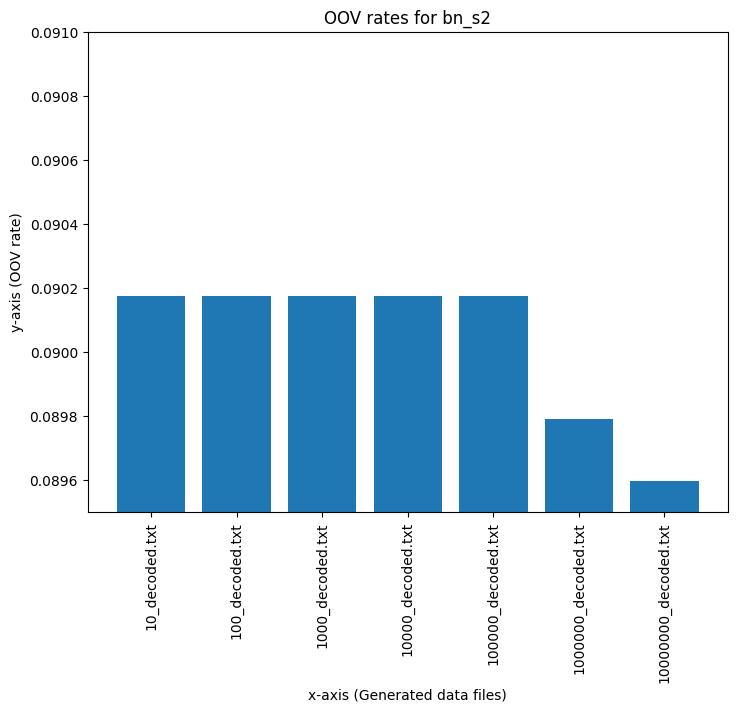

In [338]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in bn_s2_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.ylim(0.0895, 0.0910)
plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for bn_s2")
plt.xticks(rotation=90)
plt.show()

### oov rates for bn_s3

In [341]:
bn_s3_oov_rates = {}

path = '/home/snlp-project-21/Desktop/SNLP-Project/GeneratedData/bn_s3/decoded/'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]

for file in files:
    f = open(os.path.join(path,file),'r')
    
    generated_data = f.read()
    generated_data = re.sub('\s+', " ", generated_data) # Removing white spaces
    generated_data_tokens = generated_data.split(" ")

    aug_train_data = eng_train_tokens + generated_data_tokens
    
    k = CalcOOV.calc_oov_rate(aug_train_data,eng_test_tokens)
    bn_s3_oov_rates[file] = k

bn_s3_oov_rates = dict(sorted(bn_s3_oov_rates.items(), key = lambda item: item[0], reverse =True))
for file, oov in bn_s3_oov_rates.items():
    print("OOV rate for file", file, "is", oov)

OOV rate for file 10_decoded.txt is 0.0901749663526245
OOV rate for file 100_decoded.txt is 0.0901749663526245
OOV rate for file 1000_decoded.txt is 0.0901749663526245
OOV rate for file 10000_decoded.txt is 0.0901749663526245
OOV rate for file 100000_decoded.txt is 0.0901749663526245
OOV rate for file 1000000_decoded.txt is 0.0901749663526245
OOV rate for file 10000000_decoded.txt is 0.08979042491828494


### plotting graph of oov rates for bn_s3

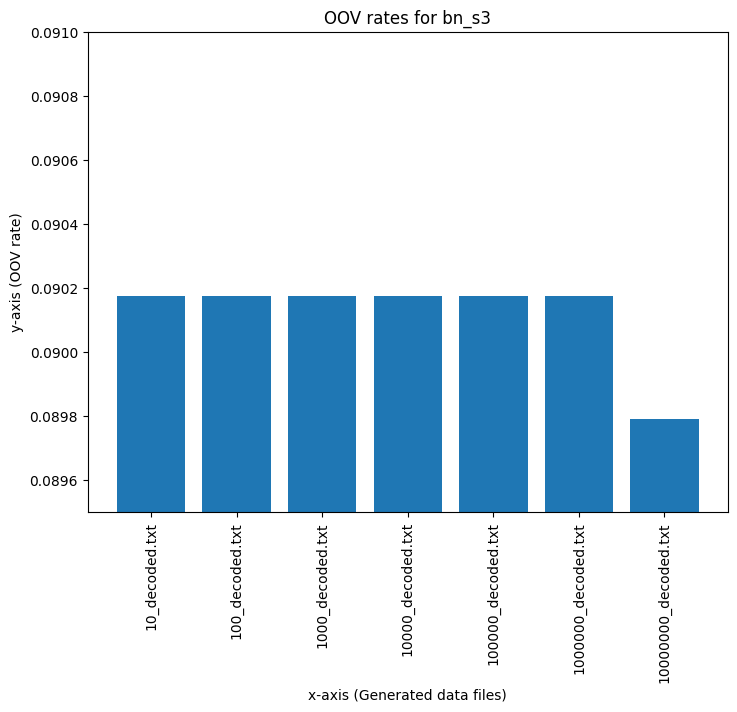

In [342]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x_axis = []
y_axis = []

for (file, oov_rate) in bn_s3_oov_rates.items():
    x_axis.append(file)
    y_axis.append(oov_rate)

ax.bar(x_axis, y_axis)

plt.ylim(0.0895, 0.0910)
plt.xlabel("x-axis (Generated data files)")
plt.ylabel("y-axis (OOV rate)")
plt.title("OOV rates for bn_s3")
plt.xticks(rotation=90)
plt.show()

### **Observation for OOV rates**

We observed that in each language model, oov rate is reducing when we increase the size of generated text file. This happens because we are increasing the number of tokens in our train data and chances of encountering the unseen tokens reduces. OOV rate decreases as we move from character level model to lower size vocabolary but remains same or higher as we go to higher level vocabolary. Hence, we should not create model with vocabolary equal to unique character size and also not equal to very high vocabolary size which will result in uneccesary creation of very high amount od words. We are getting good results with smaller vocabolary size(100-800) as it is sufficient to create all necessary words and also reduce the chances of unseen tokens. Hence, we will reccommend the usage of smaller vocabolary size model for both corpus(English and Bengali).

## **6 Analysis**

In this Project we have utilized the skills that we developed during our course of Statistical Natural Language Processing and aim to reduce OOV rate using sub word techniques. The Project has been divided into 5 tasks, namely – Pre-processing, Sub-words, LM Training, Text Generation and OOV comparison. 

In the first section, we did pre-processing for both English and Bengali Corpus as it is necessary to convert the raw data into a more understandable, useful, and efficient format. We removed the special characters and redundant data, to reduce the overhead during compilation of the model and only processing relevant data and not the waste data. While working on the Bengali Corpus some discrepancies occurred like the presence of long sentence length so we split these sentences during the pre-processing. 

In sub-word segmentation, breaking down the word into smaller units helps us to address the structure of the word more efficiently. We created data for our language model based on three different subword granularity – characters, subword units (closer to characters) and sub words units (closer to words).
For the english language model with the subword granularity as character level, we defined the vocab size as 31 and obtained our trained prefix model for it. We repeated the same process for the remaining 2 levels - subwords with smaller vocabulary and subwords with larger vocabulary, with the vocab size 150 and 2000 respectively. We did the same process for the Bengali Corpus at all three levels - character, subwords with smaller vocabulary and subwords with larger vocabulary with the vocabulary values as 51, 200 and 2000 respectively.
We observed that even though number of unique alphabets in english are 26 but still minimum vocabolary size for character level prefix model is higher because we also require some additional tokens like stop token '$</s>$', '$_$' which are essesntial for training model and subword encoding. This is similar while training character level prefix model for bengali corpus, but bengali's vocabolary size is larger than english because bengali is morphologically rich and have more number of unique characters.
Thereafter, we encoded the original text using all 6 trained prefix model to obtain the segmented text. We also decoded the segmented text back to original text, thus validating the working of prefix model.

We used RNNLM toolkit to train RNN model on subword units generated using sentence piece. As with all neural models, the performance and computation times depend on the number of hidden layers, backpropagation parameter. We tried to change the values of hyperparameters like class and hidden while training the RNN model. It is good practice to keep the class size less than vocabolary size for better results and we followed it. We tried different values for the hyperparameters(class and hidden) and finalised the one where perplexity was optimum and better than the baseline model. In same granularity level we observed that bengali's perplexity was higher than english due to alphabatetical and morphological richness of bengali and also due to presence of complex word structures.

In text generation, we used RNN model to generate artificial data files $10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7$ for all six models. We decoded the data files, and observed that for lower size files there are no proper language words being generated but if we go on to check higher size data files then we can see proper language words in that file. This scenario improves as we move to files generated by higher vocabolary model as it is able to recognise more words and hence genrated files having more meaningful words.


In OOV comparison, we have observed that oov rate is improving as we move from for lower size files to higher size files in all language models because more number of meaningful tokens are added into our training data. If we compare 100.txt of particular granularity level model to 1000000.txt of same model then we observe that there are more proper words added in the text and chances of encountering the unseen tokens in test data are reduced. Hence improving the OOV rate. We also get better results as we advance from character level vocabolary to smaller vocabolry but reduces or remain same for higher vocabolary .


Conclusion, while working on the project we learnt about the importance to the data pre-processing and technique to implement sub word encoding. It make the evaluation and training more efficient. Then we learnt about the RNNLM model since an RNN deals with the variable length inputs, it is a suitable for modelling the sequential data such as sentences in natural language like in our corpus. Then we used RNNLM to generate artificial data as per our trained model for different output tokens to observe the adaptability of our model. At the end we use OOV rate comparisons to observe how our system behaves when we have more unseen words in our training corpus, we have observed that for higher token length there is a lower OOV comparison, but in general it reduces with the increase in the token length. Our aim was to reduce OOV rate with subword technique and we achieved it.
